# KMeans Cluster

One of the most famous clustering methods. Unsupervised machine learning algorithm. Calculates a center point which is the average of randomly selected centroids to calculate the euclidean distance of all the points around it to generate clusters. Works best with circular clusters. Not great with noise 

Algorithm
- Randomly assign centreoids
- assign each datapoint to a cluster by calculating its euclidean distance from a centroid
- calculate the mean coordiantes of each each cluster and use as new centroid
- reassign clusters based on new centroid
- repeat previous two steps until convergence

## Potential Implementation of KMeans Cluster

In [10]:
import numpy as np
import numpy.matlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

In [2]:
# helper function to calculate euclidean distance
# implementation of basic distance formula
def calc_distance(x1, x2):
    return (sum(x1 - x2)**2)**.5

# function to return what cluster a value belongs to
def assign_clusters(centroids, cluster_array):
    clusters = []
    # iterate through each point
    for i in range(cluster_array.shape[0]):
        distances=[]
        
        # calculate distance to every centroid
        for centroid in centroids:
            distances.append(calc_distance(centroid, cluster_array[i]))
            
        # assigns each point to the closest centroid
        cluster = [j for j, val in enumerate(distances) if val == min(distances)]
        clusters.append(cluster[0])
        
        return clusters
    
# updates to assign new centroids
# calculates new centroids based on cluster's mean
def calc_centroid(clusters, cluster_array):
    new_centroids = []
    
    # combine cluster array and cluster labels together
    cluster_df = pd.concat([pd.DataFrame(cluster_array), 
                            pd.DataFrame(clusters, columns=["cluster"])])
    
    # iterate through each cluster
    for c in set(cluster_df["cluster"]):
        current_cluster = cluster_df[cluster_df["cluster"]==c][cluster_df.columns[:--1]]
        # mean entire dataframe to create new centroids
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    
    return new_centroids

# calculate the variance within each cluster
def calc_centroid_variance(clusters, cluster_array):
    sum_squares = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array), pd.DataFrame(clusters, columns=["cluster"])])
    
    for c in set(cluster_df["cluster"]):
        current_cluster = cluster_df[cluster_df["cluster"]==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        
        # replicates the array
        mean_repmat = np.matlib.repmat(cluster_mean, current_cluster.shape[0],1)
        sum_squares.append(np.sum(np.sum((current_cluster - mean_repmat)**2)))
        
    return sum_squares

k = 4
cluster_vars = []

centroids = [cluster_array[i+2] for i in range(k)]
clusters = assign_clusters(centroids, cluster_array)
initial_clusters = clusters
print(0, round(np.mean(calc_centroid_variance(clusters, cluster_array))))

for i in range(20):
    centroids = calc_centroids(clusters, cluster_array)
    clusters = assign_clusters(centroids, cluster_array)
    cluster_var = np.mean(calc_centroid_variance(clusters, cluster_array))
    cluster_vars.append(cluster_var)
    print(i+1, round(cluster_var))

# SKLearn Implementation

In [11]:
# iris dataset for testing

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import pandas as pd

iris = datasets.load_iris()
x = iris.data
y = iris.target
example_dataset = StandardScaler().fit_transform(x)

In [7]:
from sklearn.cluster import KMeans
# number of clusters
n = 2
df = x

kmeans_kwargs = {"init":"random", "n_init":10, "max_iter": 300, "random_state": 42,}

kmeans = KMeans(n_clusters=n, **kmeans_kwargs)
kmeans.fit(df)

### SSE and Silhouette Testing

tests to identify proper cluster amounts with SSE and Silhouette Testing.

Text(0, 0.5, 'Silhouette Coefficient')

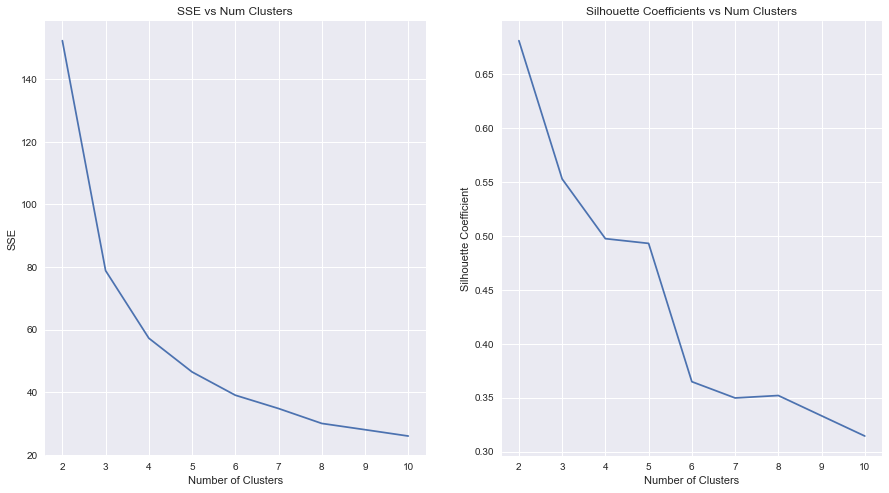

In [16]:
from sklearn.metrics import silhouette_score

df = x
kmeans_kwargs = {"init":"random", "n_init":10, "max_iter": 300, "random_state": 42,}

sse = []
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_coefficients.append(score)
    
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

axes[0].plot(range(2, 11), sse)
axes[0].set_xticks(range(2, 11))
axes[0].set_title("SSE vs Num Clusters")
axes[0].set_xlabel("Number of Clusters")
axes[0].set_ylabel("SSE")

axes[1].plot(range(2, 11), silhouette_coefficients)
axes[1].set_xticks(range(2, 11))
axes[1].set_title("Silhouette Coefficients vs Num Clusters")
axes[1].set_xlabel("Number of Clusters")
axes[1].set_ylabel("Silhouette Coefficient")